# Energy Production Prediction

**Authors:**

1. Wyclife Orimba
2. Elsie Ochieng
3. Dennis Mutuku
4. Allan Ngeiywa

## Project Overview
Accurately forecasting energy production is crucial for ensuring a reliable and sustainable energy supply. This project aims to develop a time series forecasting model to predict energy production using a dataset of historical energy production data, along with relevant weather, economic, and regulatory factors.

## Business Understanding
The United States has a long and intricate history of energy production marked by technological advancements, environmental concerns, and a growing demand for reliable and sustainable energy sources.

Energy production dates back to 1882 when Thomas Edison constructed Pearl Street Station, the first purpose –built power station. In the same year Edison’s power station, the world’s first hydroelectric plant, went on-line in Appleton, Wisconsin demonstrating the potential of hydropower as a renewable energy source.

The nation's energy landscape has since evolved from its early reliance on hydropower and fossil fuels to embrace a diversified mix of renewable energy sources, including solar, wind, and geothermal power. This transition has been driven by environmental concerns, technological advancements, and government policies aimed at reducing greenhouse gas emissions and promoting energy independence.

Currently, the US energy mix is undergoing a significant transformation, with a growing share of renewable energy and natural gas, while coal's dominance is declining. This shift reflects the nation's commitment to decarbonization and the pursuit of cleaner energy sources. However, the challenge of producing enough energy to meet the demands of an ever-growing population remains

## Problem Statement
The United States is the world's second-largest producer of energy, producing about 16% of the world's energy, for both consumption and exportation. Energy production, however, is not a static process; it is subject to fluctuations that can have significant economic and social consequences.

In 2022 the United States was the largest consumer of energy consuming 100.41 quads according to U.S. Energy Information Administration. This means that ensuring a consistent and reliable energy supply is paramount for sustaining the nation's economic stability and meeting the needs of its population.

As the U.S. transitions towards renewable energy sources, the phasing out of traditional energy sources might create a potential gap incapable of meeting the nation's energy demands. Ensuring a smooth transition necessitates a prediction model that accurately anticipates energy production, guaranteeing a balance between the declining traditional sources and the burgeoning renewable ones. Such a model becomes vital to prevent disruptions in energy supply, uphold stability, and sustainably meet the increasing energy needs during this pivotal shift in the energy landscape.

## Justification of the Study
This study focuses on creating a dependable forecasting model for energy production. Accurate predictions empower efficient management of energy demand, aid in proper resource allocation and planning in line with production trends, and reduce costs associated with energy fluctuations. By developing a robust forecasting tool, this study aims to ensure consistent production, bolstering energy security, and enabling informed decision-making.

### Business Objectives
The main objectives in this project will be:
1.	Develop a robust time series forecasting model that accurately predicts energy production patterns.
2.	Integrate external variables to enhance the model's predictive capabilities.
3.	Create an adaptive model that can adjust to changing conditions and evolving production patterns.
4.	Provide a user-friendly interface for stakeholders to access and interpret forecasted energy production data.
5.	Contribute to cost savings, efficient resource utilization, and environmental sustainability through improved energy production forecasts.

### Project Metric of Success
Building a model with a low MSE

## Data Understanding
The data was sourced from the Federal Reserve Economic Data (FRED) that contains frequently updated US macro and regional economic time series at annual, quarterly, monthly, weekly, and daily frequencies. The data contains the following features:

 * Date: Captures monthly timestamps from January 1939 to October 2023.
 * IPG2211A2N: Values showing energy produced for each month

### Importing libraries and loading data

In [1]:
# !pip install --upgrade numpy
# !pip install numpy==1.19
# !pip install --user pmdarima
# !pip install pmdarima==1.8.0

# Importing the neccesary libraries
import numpy as np
import scipy as sp
import pandas as pd
import math

#Visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Modeling
import scipy.stats as stats
import statsmodels.api as sm
import pmdarima as pm
from statsmodels.tsa.stattools import adfuller
from sklearn.model_selection import train_test_split
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from pmdarima import auto_arima
from statsmodels.tsa.statespace.sarimax import SARIMAX
from fbprophet import Prophet
from sklearn.metrics import mean_squared_error
from fbprophet.plot import add_changepoints_to_plot

import warnings
warnings.filterwarnings('ignore')

C:\Users\Dennis\anaconda3\envs\learn-env\lib\site-packages\scipy\__init__.py:173: UserWarning: A NumPy version >=1.19.5 and <1.27.0 is required for this version of SciPy (detected version 1.19.0)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [1]:
import pandas as pd

In [3]:
# Read energy data from CSV file into dataframe
energy_df = pd.read_csv('IPG2211A2N.csv')
# Preview first 10 records
energy_df.head(10)

,DATE,IPG2211A2N
0,1939-01-01,3.3336
1,1939-02-01,3.3591
2,1939-03-01,3.4354
3,1939-04-01,3.4609
4,1939-05-01,3.4609
5,1939-06-01,3.5117
6,1939-07-01,3.5117
7,1939-08-01,3.5626
8,1939-09-01,3.6644
9,1939-10-01,3.6644


In [3]:
# Check column names
energy_df.columns

Index(['DATE', 'IPG2211A2N'], dtype='object')

In [4]:
# Display information about dataframe
energy_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1018 entries, 0 to 1017
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   DATE        1018 non-null   object 
 1   IPG2211A2N  1018 non-null   float64
dtypes: float64(1), object(1)
memory usage: 16.0+ KB


## Data Preprocessing

In [5]:
# Check number of rows and columns
energy_df.shape

(1018, 2)

In [6]:
# Check description of the df
energy_df.describe()

,IPG2211A2N
count,1018.000000
mean,56.242813
std,35.778253
min,3.333600
25%,20.523325
50%,56.524650
75%,89.281275
max,126.373300


In [7]:
# Check for missing values
energy_df.isnull().sum()

DATE          0
IPG2211A2N    0
dtype: int64

In [8]:
# Checking for duplicates
energy_df.duplicated().sum()

0

We observed the following, the dataset containd 1018 rows and 2 columns containing the units of energy produced and date of recording. Thre are no missing values in the dataset and no duplicate rows in the dataset as well.

In [4]:
# Renaming the columns if the df
energy_df.columns = ['Date', 'Energy_production']
energy_df.head()

,Date,Energy_production
0,1939-01-01,3.3336
1,1939-02-01,3.3591
2,1939-03-01,3.4354
3,1939-04-01,3.4609
4,1939-05-01,3.4609


In [5]:
# Convert Date column into Datetime
energy_df['Date'] =pd.to_datetime(energy_df['Date'])
energy_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1018 entries, 0 to 1017
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Date               1018 non-null   datetime64[ns]
 1   Energy_production  1018 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 16.0 KB


### Feature Engineering
Feature engineering is an essential step in time series forecasting, as it involves transforming raw data into meaningful features that can be effectively utilized by the forecasting model. In this context, we will extract two new features from the 'Date' column: 'Year' and 'Month'. These new features will provide valuable insights into the seasonal patterns of the time series data. The 'Year' feature will enable the model to capture long-term trends and patterns that may span across multiple years. For instance, the model may identify recurring seasonal patterns or detect shifts in overall trends over time.

The 'Month' feature will allow the model to capture more granular seasonal patterns within each year. By incorporating month-specific information, the model may better understand the impact of seasonal factors on the time series variable.
By extracting these seasonal features, we aim to enhance the predictive capabilities of the time series model by providing it with additional context about the underlying temporal patterns in the data.

In [7]:
#Extract month into a new column
energy_df['Month'] = energy_df['Date'].dt.month

In [8]:
# Create a function to map months to seasons
def get_season(month):
    if month in [12, 1, 2]:  # Winter: December, January, February
        return 'Winter'
    elif month in [3, 4, 5]:  # Spring: March, April, May
        return 'Spring'
    elif month in [6, 7, 8]:  # Summer: June, July, August
        return 'Summer'
    else:  # Fall: September, October, November
        return 'Fall'
# Apply the function to the 'DATE' column to create a new 'Season' column
energy_df['Season'] = energy_df['Date'].dt.month.apply(get_season)


In [9]:
# Set Date As the index
energy_df.set_index('Date', inplace = True)
energy_df.head()

,Energy_production,Month,Season
Date,,,
1939-01-01,3.3336,1,Winter
1939-02-01,3.3591,2,Winter
1939-03-01,3.4354,3,Spring
1939-04-01,3.4609,4,Spring
1939-05-01,3.4609,5,Spring


## Exploratory Data Analysis and Visualization

In this section, the focus is on obtaining crucial insights from the energy production dataset through Exploratory Data Analysis (EDA) and Visualization. As the United States shifts toward renewable energy sources, the primary objective is to forecast accurate energy patterns.

This analysis delves into understanding the dataset's temporal trends, statistical characteristics, and seasonal variations to uncover trends, patterns, and relationships.

By utilizing various visualization techniques and statistical methods, this exploration aims to inform the development of robust forecasting models and shed light on the dynamics of energy production during this transitional phase.

In [15]:
# Descriptive statistics of the dataframe
energy_df.describe()

,Energy_production,Month
count,1018.000000,1018.000000
mean,56.242813,6.490177
std,35.778253,3.449937
min,3.333600,1.000000
25%,20.523325,3.250000
50%,56.524650,6.000000
75%,89.281275,9.000000
max,126.373300,12.000000


The production has a wide range, with a minimum of 3.33 units and a maximum of 126.37 units per month through out the years. The standard deviation of 35.78 units from the mean indicates a moderate degree of variability in production levels. The 25th percentile 20.52 units and 75th percentile 89.28 units provide a narrower range of typical production levels, encompassing 50% of the observations.

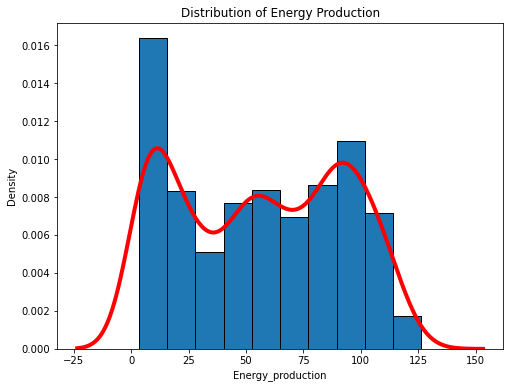

In [16]:
# Create a histogram
plt.figure(figsize=(8, 6))
plt.hist(energy_df['Energy_production'], edgecolor='black', density=True)
# Plot KDE
sns.kdeplot(energy_df['Energy_production'], color='red', linewidth=4)
# Set labels and title
plt.xlabel('Energy_production')
plt.ylabel('Density')
plt.title('Distribution of Energy Production')
plt.show()

A visual inspection of the data indicates that it does not have a normal distribution.

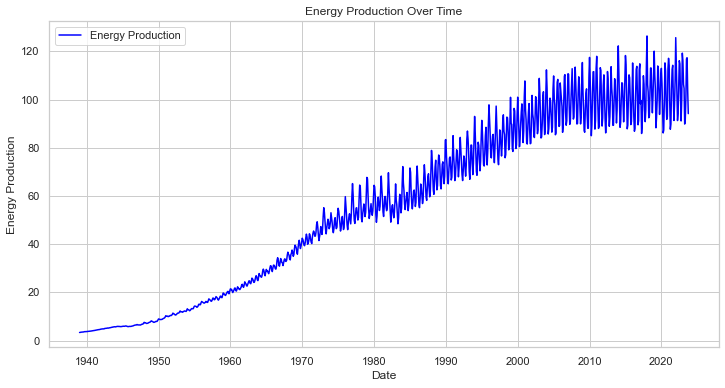

In [17]:
# Set the style for seaborn
sns.set(style="whitegrid")

# Plotting the data
plt.figure(figsize=(12, 6))
sns.lineplot(x=energy_df.index, y='Energy_production', data=energy_df, label='Energy Production', color='blue')

# Adding labels and title
plt.xlabel('Date')
plt.ylabel('Energy Production')
plt.title('Energy Production Over Time')
plt.legend()

# Show the plot
plt.show()

The plot shows that energy production has increased steadily over time.

Between the 1940s to 1970s energy production did increase however it lacked the sharp upward trajectory one might expect. This can be attributed to several factors, including the disruption caused by World War II, the focus on post-war recovery, and the geopolitical tensions of the Cold War.

In the 1980s, energy production began to increase again, driven by the economic recovery and the development of new energy technologies.

Since then, energy production continued to increase, but at a slower pace. This is due to a number of factors, including the increasing cost of fossil fuels and the growing awareness of the environmental impacts of energy production.

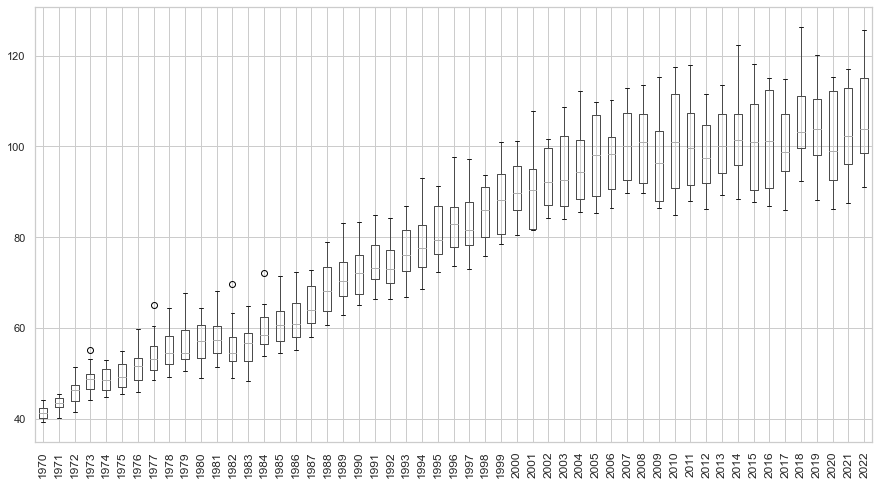

In [18]:
# Create copy df for energy production
dfproduction = pd.DataFrame(energy_df['Energy_production'])

# Use pandas grouper to group values using annual frequency
year_groups = dfproduction['1970':'2022'].groupby(pd.Grouper(freq ='A'))

# Create a new DataFrame and store yearly values in columns  
energy_annual = pd.DataFrame() 

for yr, group in year_groups:
    energy_annual[yr.year] = group.values.ravel()
# Generate a box plot for energy_annual
energy_annual.boxplot(figsize = (15,8))
plt.xticks(rotation=90, fontsize=12)
plt.show()

From the boxplots we see that the median energy production has increased steadily over time, from around 40 units in 1970. This suggests that the typical power plant is producing more energy today than it was in the past.

The quartiles also show that the distribution of energy production has become more spread out over time. This suggests that there is a greater range of energy production levels among power plants today than there was in the past.

We can also see that there are outliers in the data. When it comes to energy production, could be due to a number of factors, such as extreme weather events, economic recessions, or changes in government policy. Research into the specific years and the factors that may have affected energy production revealed the following:

**1973 Oil Crisis:** The OPEC oil embargo began in October 1973 leading to a significant increase in oil prices and causing an energy crisis in the United States. This event highlighted the dependency on foreign oil and prompted efforts to reduce reliance on oil imports which may have led to some power plants switching to other sources of fuel, such as coal, which can produce more energy per unit of fuel.

**1977 National Energy Act:**  The National Energy Act  was passed which aimed to promote energy conservation and the development of alternative energy sources. This may have led to some power plants switching to other sources of fuel, such as coal, which can produce more energy per unit of fuel.

**1982 Natural Gas Policy Act:** The Natural Gas Policy Act of 1978 was passed in response to natural gas shortages in the United States. The act deregulated the price of natural gas, which led to an increase in production and eventually helped to alleviate the shortages.

**1984 Energy Security Act:** The Energy Security Act of 1980 was passed in response to the Iranian Revolution and the subsequent oil price shock. The act authorized the creation of the Strategic Petroleum Reserve, which is a stockpile of crude oil that can be used to meet emergency needs. The act also included a number of provisions aimed at diversifying the United States' energy sources and reducing its dependence on foreign oil.


## Bivarite Analysis

In this section, we look at the relationship between monthly energy production and the ever-changing weather seasons. This exploration aims to uncover insights that can enhance our understanding of how energy production fluctuates throughout the year. By analyzing month-by-month data alongside seasonal variations, we can identify crucial trends and potential influences of weather on energy output.

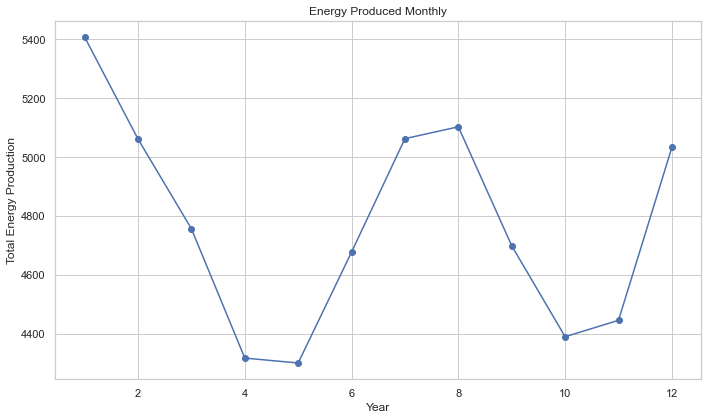

In [19]:
# Grouping by year and calculating the total units produced for each year
units_produced_yearly = energy_df.groupby('Month')['Energy_production'].sum()

# Creating a line graph to show the growth in units produced over the years
plt.figure(figsize=(10, 6))
plt.plot(units_produced_yearly.index, units_produced_yearly.values, marker='o', linestyle='-')

plt.title('Energy Produced Monthly')
plt.xlabel('Year')
plt.ylabel('Total Energy Production')
plt.grid(True)
plt.tight_layout()

plt.show()

From the line graph above we noted that energy demand was lowest in April, May, October and November. Further research revealed that energy demand typically decreases during seasons with milder weather conditions such as Spring and Fall which the months in question fall under. This is because of decreased demand for heating and cooling.

We noted that peak production occured in January, February, July, August and December.
These months fall under Winter when heating demands are high and Summer when there is increased demand for air conditioning

The graph below illustrates energy production by season showing Fall and Spring having lowest energy produced further highlighting Fall and Spring as periods with the lowest energy production. This reaffirms that seasons featuring milder weather conditions exhibit lower consumption, consequently resulting in reduced production

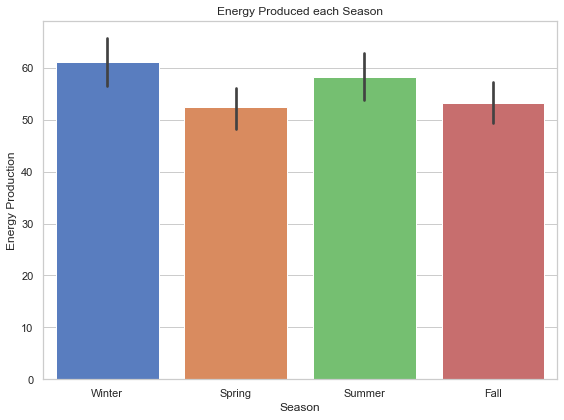

In [20]:
# Plotting the units produced by season using Seaborn
plt.figure(figsize=(8, 6))
sns.barplot(data=energy_df, x='Season', y='Energy_production', palette='muted')
plt.title('Energy Produced each Season')
plt.xlabel('Season')
plt.ylabel('Energy Production')

plt.tight_layout()
plt.show()

## Time Series Modeling

### Checking for Stationarity

### Rolling Mean

In [21]:
# Determine rolling statistics
roll_mean = dfproduction.rolling(window=8).mean()
roll_std = dfproduction.rolling(window=8).std()

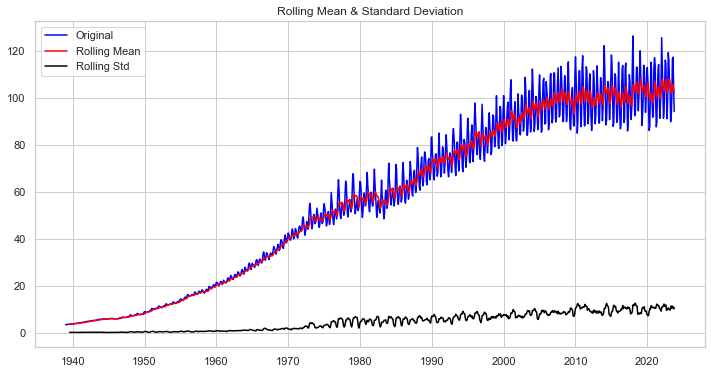

In [22]:
# Plot rolling statistics
fig = plt.figure(figsize=(12,6))
plt.plot(dfproduction, color='blue',label='Original')
plt.plot(roll_mean, color='red', label='Rolling Mean')
plt.plot(roll_std, color='black', label = 'Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show()

Analyzing the rolling statistics of the time series plot reveals two key observations:

 - **Non-stationary mean:** The red line representing the rolling mean closely follows the blue line of the original time series. This suggests that the mean of the series is not stationary. To confirm this, we should proceed with an Augmented Dickey-Fuller (ADF) test.

 - **Consistent standard deviation:** The green line representing the rolling standard deviation is relatively flat and remains at a low value. This indicates that the variability of the series is consistent and relatively low, suggesting a potentially stable process within the time series.

### Adfuller Test

In [24]:
# Function to perform Augmented Dickey-Fuller test for stationarity
# ho: It is non stationary
# h1: It is stationary
def adfuller_test(Energy_production):
    result = adfuller(Energy_production)
    labels = ['ADF Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used']
    for value, label in zip(result,labels):
        print(label+' : '+str(value))
    if result[1] <= 0.05:
        print('Reject the null hypothesis')
    else:
        print('Data is non stationary')

In [25]:
# Perform ADF test on the 'Energy_production' column
adfuller_test(energy_df['Energy_production'])

ADF Test Statistic : -0.7063953739576422
p-value : 0.8450860298860358
#Lags Used : 22
Number of Observations Used : 995
Data is non stationary


From the adfuller test we observed the following:
 - **ADF Test Statistic(0.7064):** The test statistic is negative and indicates the extent to which the data deviates from stationarity. A more negative value is considered better for stationarity.

 - **p-value(0.8451):** The p-value is quite high (greater than 0.05), suggesting strong evidence against the null hypothesis. This implies that we cannot reject the null hypothesis, indicating the presence of non-stationarity in the data.

### Differencing

In [26]:
#log transform the data to normalize it
log_df = np.log(energy_df['Energy_production'])

# Convert the series to a DataFrame
energy_df2 = pd.DataFrame(log_df)

energy_df2

,Energy_production
Date,
1939-01-01,1.204053
1939-02-01,1.211673
1939-03-01,1.234133
1939-04-01,1.241529
1939-05-01,1.241529
...,...
2023-06-01,4.610513
2023-07-01,4.760835
2023-08-01,4.765063


In [27]:
# Make the Time Series Stationary
# Take the first difference to make the series stationary
energy_df2['Energy_production First Difference'] = energy_df2['Energy_production'] - energy_df2['Energy_production'].shift(1)

In [28]:
energy_df2['Energy_production'].shift(1)

Date
1939-01-01         NaN
1939-02-01    1.204053
1939-03-01    1.211673
1939-04-01    1.234133
1939-05-01    1.241529
                ...   
2023-06-01    4.519660
2023-07-01    4.610513
2023-08-01    4.760835
2023-09-01    4.765063
2023-10-01    4.640169
Name: Energy_production, Length: 1018, dtype: float64

In [29]:
# We do differencing for 12 months
energy_df2['Seasonal First Difference'] = energy_df2['Energy_production'] - energy_df2['Energy_production'].shift(12)

In [30]:
energy_df2.head(14)

,Energy_production,Energy_production First Difference,Seasonal First Difference
Date,,,
1939-01-01,1.204053,NaN,NaN
1939-02-01,1.211673,0.007620,NaN
1939-03-01,1.234133,0.022460,NaN
1939-04-01,1.241529,0.007395,NaN
1939-05-01,1.241529,0.000000,NaN
1939-06-01,1.256100,0.014572,NaN
1939-07-01,1.256100,0.000000,NaN
1939-08-01,1.270491,0.014390,NaN
1939-09-01,1.298665,0.028174,NaN


Given the presence of very high seasonality, we will first use seasonal differencing. Given
m=12, we need to difference the observation at time t with its lag at t-12. If we do this, the first
12 observations of the differenced series will take NaN values.

This will create a new column Energy_Production_diff that represents the 12-period difference
of 'Energy_Production'

We then remove the NaN observations and plot the data series to check if differencing made the
series stationary.

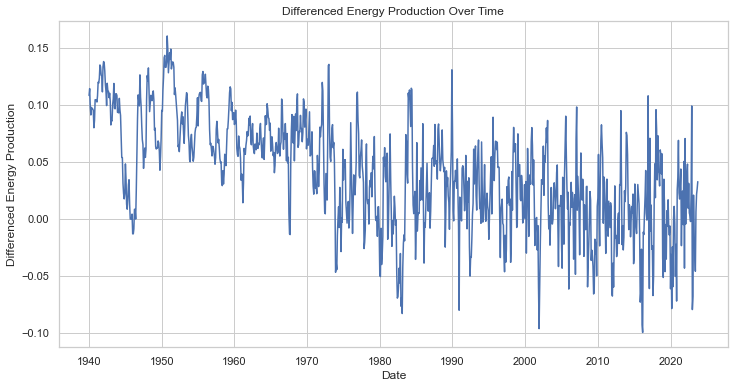

In [31]:
# Plot the differenced time series
plt.figure(figsize=(12, 6))
plt.plot(energy_df2['Seasonal First Difference'])
plt.title('Differenced Energy Production Over Time')
plt.xlabel('Date')
plt.ylabel('Differenced Energy Production')
plt.show()

In [32]:
# Check stationarity of the differenced time series
# Test the dickey fuller test again
adfuller_test(energy_df2['Seasonal First Difference'].dropna())

ADF Test Statistic : -3.484902163003674
p-value : 0.008383410897798899
#Lags Used : 16
Number of Observations Used : 989
Reject the null hypothesis


Conclusion:The p value is less than 0.05, Reject the null hypothesis;the
time series is stationary

### Decomposition 

In [33]:
# # Create a copy of the log df for decomposition
energy_df3 = pd.DataFrame(log_df)
# Decompose the time series into trend, seasonal, and residual components
decomposition = sm.tsa.seasonal_decompose(energy_df3['Energy_production'])

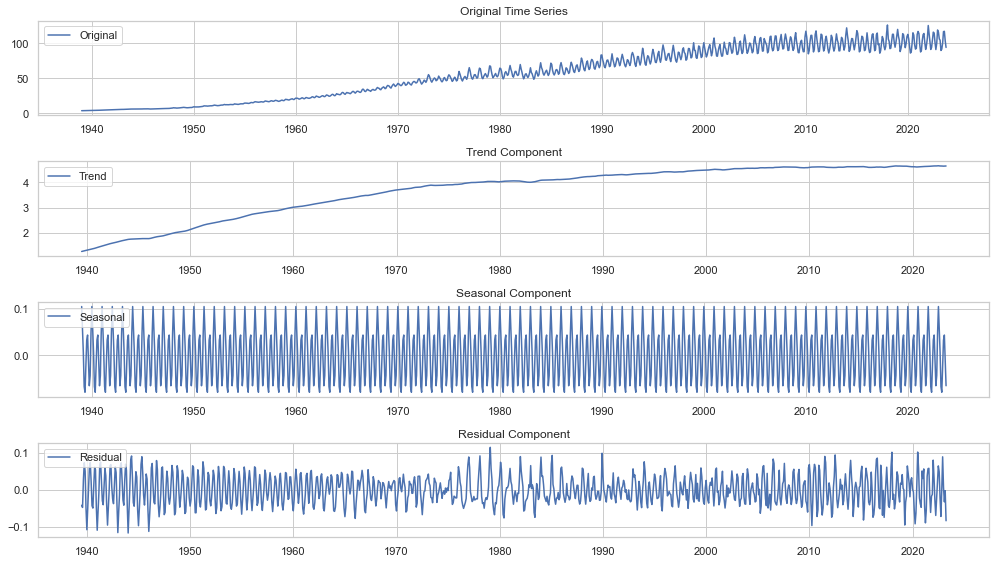

In [34]:
# Plot the decomposed components
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.figure(figsize=(14, 8))

plt.subplot(411)
plt.plot(energy_df['Energy_production'], label='Original')
plt.legend(loc='upper left')
plt.title('Original Time Series')

plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='upper left')
plt.title('Trend Component')

plt.subplot(413)
plt.plot(seasonal, label='Seasonal')
plt.legend(loc='upper left')
plt.title('Seasonal Component')

plt.subplot(414)
plt.plot(residual, label='Residual')
plt.legend(loc='upper left')
plt.title('Residual Component')

plt.tight_layout()
plt.show()

From the plots above the observed the following:
 - The series exhibits a clear upward trend over the years, indicating a consistent increase in energy production.
 

 - The trend component captures the long-term upward trajectory of the series, highlighting the gradual growth in energy production over the period analyzed.
 

 - The seasonal component reveals the presence of repeating annual patterns in the data. This likely reflects seasonal variations in energy consumption and production due to factors like temperature, daylight hours, and economic activity.
 

 - The residual component appears to have no discernible pattern, suggesting that the trend and seasonal components effectively capture the main underlying dynamics of the series.

In [35]:
# Drop missing values from residuals 
ts_log_decompose = residual
ts_log_decompose.dropna(inplace=True)

# Check stationarity
adfuller_test(ts_log_decompose)

ADF Test Statistic : -12.840721768297174
p-value : 5.6146036667380665e-24
#Lags Used : 21
Number of Observations Used : 984
Reject the null hypothesis


The adfuller test after differencing revealed the following:

**ADF Test Statistic:** The test statistic is negative and indicating the presence of non-stationarity.

**p-value:** The p-value is lower than 0.05 suggesting strong evidence to reject the null hypothesis meaning the time series is stationary.

### Correlation and Autocorrelation

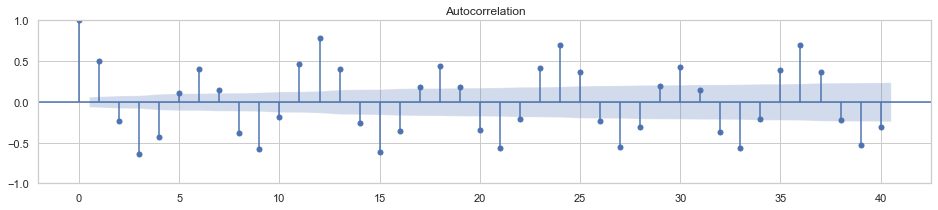

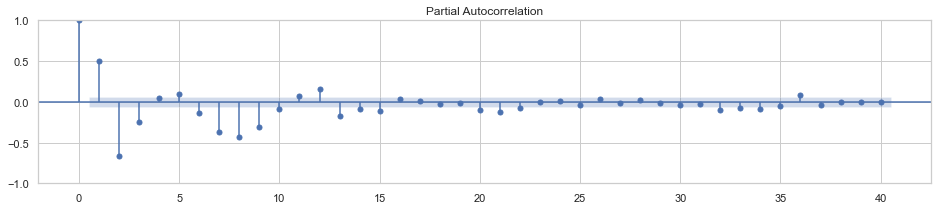

In [37]:
# Correlation and Autocorrelation plots
fig, ax = plt.subplots(figsize=(16,3))
plot_acf(ts_log_decompose, ax=ax, lags=40)

fig, ax = plt.subplots(figsize=(16,3))
plot_pacf(ts_log_decompose, ax=ax, lags=40);

PACF plot

The PACF plot shows that the energy production data is significantly correlated with the previous lag, but not with any of the subsequent lags. This suggests that the energy production data is an AR(1) process, meaning that the current value of the data is linearly dependent on the previous value of the data.

ACF plot

The ACF plot shows that the energy production data is significantly correlated with the first few lags, but the correlation decays as the lag increases. 

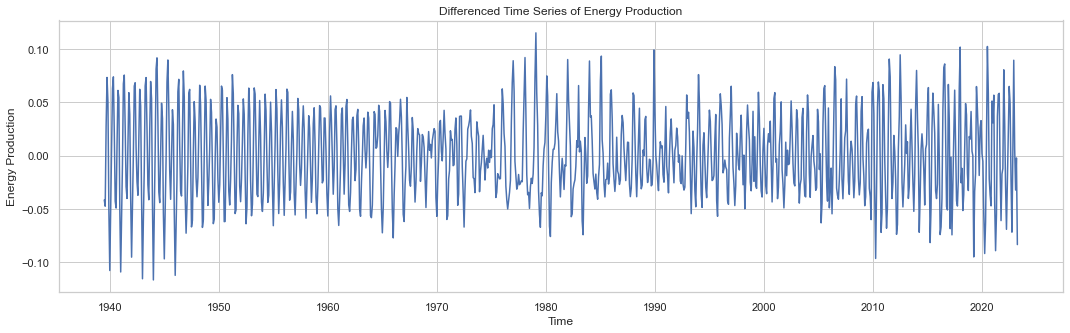

In [38]:
#plot the differenced time series of 'Energy_Production
plt.figure(figsize=(18, 5))
plt.xlabel('Time')
plt.ylabel('Energy Production')
plt.title('Differenced Time Series of Energy Production')
plt.plot(ts_log_decompose)
plt.show()

### Model 1: PMDARIMA

In [41]:
# Split data into train and test sets
no_observations = len(ts_log_decompose)

# Calculate the index to split the data
train_size = int(0.8 * no_observations)

# Split data into train and test sets
train = ts_log_decompose.iloc[:train_size]
test = ts_log_decompose.iloc[train_size:]

In [42]:
# Using auto_arima to automatically select the best SARIMA model
model = auto_arima(train, start_p=0, start_q=0,
 max_p=2, max_q=2,m=12,start_P=0,start_Q=0,
 max_P = 2, max_Q = 2,
 seasonal=True,
d=1,D=1,trace=True,
 error_action='ignore',
suppress_warnings=True,
stepwise=True)

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=-3675.236, Time=0.33 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=-3810.215, Time=0.66 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=-3919.265, Time=1.56 sec
 ARIMA(0,1,1)(0,1,0)[12]             : AIC=-3691.067, Time=0.31 sec
 ARIMA(0,1,1)(1,1,1)[12]             : AIC=-3918.415, Time=2.07 sec
 ARIMA(0,1,1)(0,1,2)[12]             : AIC=-3918.847, Time=5.76 sec
 ARIMA(0,1,1)(1,1,0)[12]             : AIC=-3816.720, Time=0.88 sec
 ARIMA(0,1,1)(1,1,2)[12]             : AIC=-3919.398, Time=6.09 sec
 ARIMA(0,1,1)(2,1,2)[12]             : AIC=-3921.661, Time=8.53 sec
 ARIMA(0,1,1)(2,1,1)[12]             : AIC=-3924.542, Time=4.65 sec
 ARIMA(0,1,1)(2,1,0)[12]             : AIC=-3900.018, Time=2.31 sec
 ARIMA(0,1,0)(2,1,1)[12]             : AIC=-3916.786, Time=4.05 sec
 ARIMA(1,1,1)(2,1,1)[12]             : AIC=inf, Time=8.03 sec
 ARIMA(0,1,2)(2,1,1)[12]             : AIC=-4164.957, Time=8.38 sec
 ARIMA(0,1,

In [43]:
#Summary of the Arima Model
print(model.summary())

                                      SARIMAX Results                                       
Dep. Variable:                                    y   No. Observations:                  804
Model:             SARIMAX(0, 1, 2)x(2, 1, [1], 12)   Log Likelihood                2088.479
Date:                              Sun, 10 Dec 2023   AIC                          -4164.957
Time:                                      19:15:55   BIC                          -4136.917
Sample:                                           0   HQIC                         -4154.180
                                              - 804                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.4655      0.031    -14.831      0.000      -0.527      -0.404
ma.L2         -0.51

In [44]:
# Creating a SARIMAX model with best order and seasonal order
pmdarima_model = SARIMAX(train,order=(0,1,2),seasonal_order=(2,1,1,12))

# Fitting the SARIMAX model to the training data
result = pmdarima_model.fit()

In [45]:
print(result.summary())

                                      SARIMAX Results                                       
Dep. Variable:                                resid   No. Observations:                  804
Model:             SARIMAX(0, 1, 2)x(2, 1, [1], 12)   Log Likelihood                2088.479
Date:                              Sun, 10 Dec 2023   AIC                          -4164.957
Time:                                      19:16:04   BIC                          -4136.917
Sample:                                  07-01-1939   HQIC                         -4154.180
                                       - 06-01-2006                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.4655      0.031    -14.831      0.000      -0.527      -0.404
ma.L2         -0.51

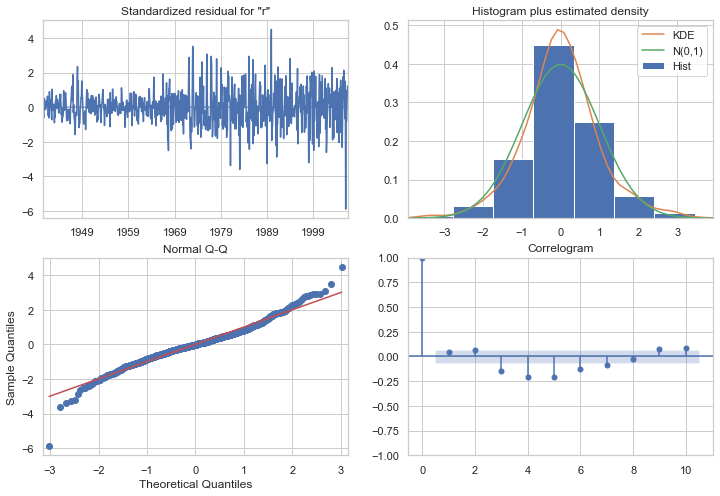

In [46]:
# Generate diagnostic plots
diagnostic_plots = result.plot_diagnostics(figsize=(12, 8))
plt.show()

### Model Evaluation

In [47]:
# Get predictions
predictions = result.predict(start=test.index[0], end=test.index[-1])

# Calculate MSE and RMSE
mse = mean_squared_error(test, predictions)
rmse = np.sqrt(mse)

# Print MSE and RMSE
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")


Mean Squared Error (MSE): 0.0008454625988933069
Root Mean Squared Error (RMSE): 0.029076839561639208


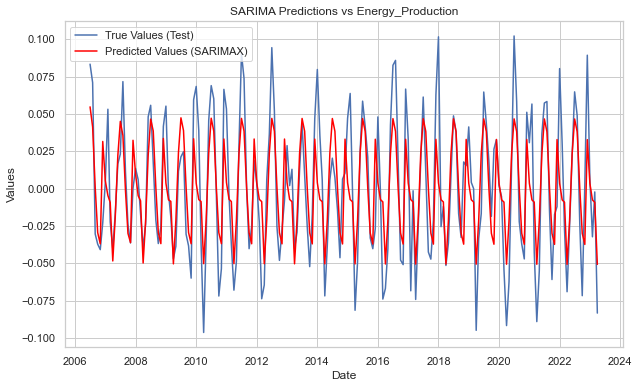

In [48]:
# Plotting test vs predicted values predictions
plt.figure(figsize=(10, 6))
plt.plot(test.index, test.values, label='True Values (Test)')
plt.plot(test.index, predictions, color='red', label='Predicted Values (SARIMAX)')
plt.xlabel('Date')
plt.ylabel('Values')
plt.title('SARIMA Predictions vs Energy_Production')
plt.legend()
plt.show()

From the plot of predictions and actual values we see that the predicted values track the actual values closely, with only a few minor deviations. The model also captures the overall trend of the data well.

### Model 2: Facebook Prophet

In [49]:
# List of columns to drop
columns_to_drop = ['Month', 'Season']
# create timeseries readable by prophet
ts = energy_df.drop(columns = columns_to_drop).copy()
ts.reset_index(inplace=True)
ts.rename(columns={'Date':'ds', 'Energy_production':'y'}, inplace=True)
ts['y'] = np.log(ts['y'])
ts

,ds,y
0,1939-01-01,1.204053
1,1939-02-01,1.211673
2,1939-03-01,1.234133
3,1939-04-01,1.241529
4,1939-05-01,1.241529
...,...,...
1013,2023-06-01,4.610513
1014,2023-07-01,4.760835
1015,2023-08-01,4.765063
1016,2023-09-01,4.640169


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Text(0.5, 1.0, 'Base Prophet Model')

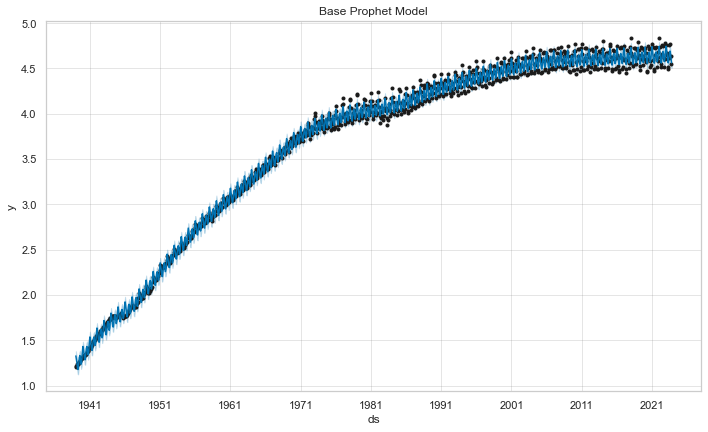

In [51]:
# Instantiate the model and fit the timeseries
base_prophet = Prophet()
base_prophet.fit(ts)

# Create a future data frame 
base_future = base_prophet.make_future_dataframe(periods=12)
base_forecast = base_prophet.predict(base_future)

# Display the most critical output columns from the forecast
base_forecast[['ds','yhat','yhat_lower','yhat_upper']].head()

# Plot
fig = base_prophet.plot(base_forecast)
plt.title('Base Prophet Model')

In [52]:
# Concantinate the predicted and the training values
merged_df = pd.merge(ts, base_forecast[['ds','yhat_lower','yhat_upper','yhat']],on='ds')
merged_df = merged_df[['ds','yhat_lower','yhat_upper','yhat','y']]

# Calculate MSE between observed and predicted values 
y_actual = merged_df['y'].values
y_prediction = merged_df['yhat'].values
base_prophet_score = mean_squared_error(y_actual, y_prediction)
base_prophet_score

0.0018830822542832807

## Model 3:Tuning Facebook Prophet Model

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Text(0.5, 1.0, 'Tuned Prophet Model')

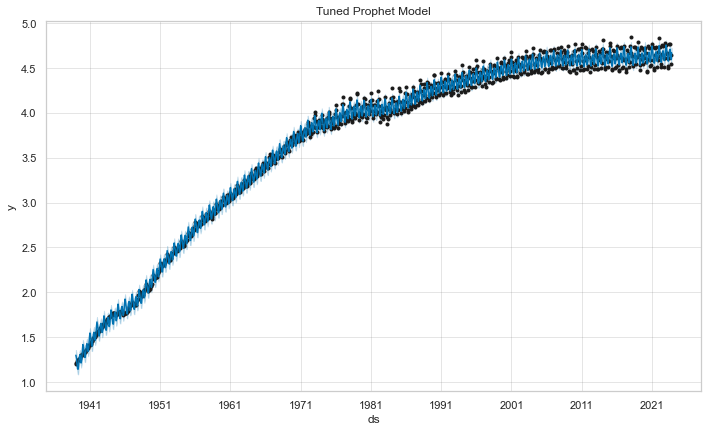

In [53]:
# Initialize a Prophet model with specific parameters for tuning
tuned_prophet = Prophet(weekly_seasonality=False, changepoint_range=0.9, changepoint_prior_scale=0.8)

# Add a custom monthly seasonality to the model
tuned_prophet.add_seasonality(name='monthly', period=30.5, fourier_order=5)

# Fit the Prophet model using the time series data
tuned_prophet.fit(ts)

# Create a dataframe for future predictions
tuned_future = tuned_prophet.make_future_dataframe(periods=12)

# Generate predictions for the future time periods
tuned_forecast = tuned_prophet.predict(tuned_future)

# Plot the forecasted values along with the historical data
fig = tuned_prophet.plot(tuned_forecast)
plt.title('Tuned Prophet Model')  # Set the title for the plot

In [54]:
# Concantinate the predicted and the training values
tuned_df = pd.merge(ts, tuned_forecast[['ds','yhat_lower','yhat_upper','yhat']],on='ds')
tuned_df = tuned_df[['ds','yhat_lower','yhat_upper','yhat','y']]

# Calculate MSE between observed and predicted values 
y_true = tuned_df['y'].values
y_pred = tuned_df['yhat'].values
tuned_prophet_score = mean_squared_error(y_true, y_pred)
tuned_prophet_score

0.0017877428575698462

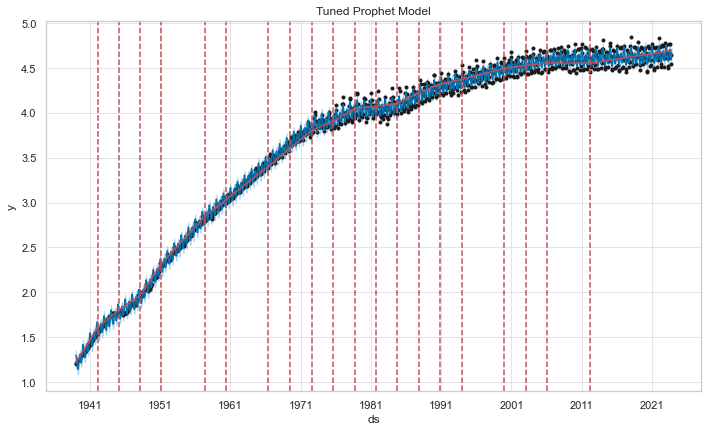

In [55]:
# Plot changepoints
a = add_changepoints_to_plot(fig.gca(),tuned_prophet,tuned_forecast)
fig

Changepoints determines how flexible the model is to the overall changepoints fit across the entire dataset.

The red dotted lines in the graph represent changepoints in the energy production prediction over the years. Changepoints are points in time where the underlying trend or seasonality in the data changes significantly.The Prophet model identifies change points by looking for patterns in the data that suggest that the underlying dynamics have changed.
For example, the Prophet model might identify a changepoint if there is a sudden shift in the trend of the data, or if the seasonal pattern changes significantly.

In the context of the energy production forecast, the red dotted lines indicate that the Prophet model has identified significant changes in the trend or seasonality of the data at those points in time. These changes could be due to a variety of factors, such as technological advancements, changes in government policy, or economic conditions.

In [56]:
# Get the MSE for each model
mse_pmdarima = mean_squared_error(test, predictions)
mse_base_prophet = mean_squared_error(y_actual, y_prediction)
mse_tuned_prophet = mean_squared_error(y_true, y_pred)

# Store MSE values in a dictionary
mse_dict = {
    "pmdarima": mse_pmdarima,
    "base_prophet": mse_base_prophet,
    "tuned_prophet": mse_tuned_prophet
}
# Sort the MSE dictionary by values in ascending order
sorted_mse = dict(sorted(mse_dict.items(), key=lambda item: item[1]))

# Convert sorted MSE dictionary to a DataFrame
mse_table = pd.DataFrame(sorted_mse.items(), columns=['Model', 'MSE'])
mse_table

,Model,MSE
0,pmdarima,0.000845
1,tuned_prophet,0.001788
2,base_prophet,0.001883


### Observations:

Our evaluation of models centered on the Mean Squared Error (MSE), a metric gauging the average squared difference between actual and estimated values. A lower MSE signifies superior predictive accuracy.

From the table illustrating the three models sorted by MSE, the PMDARIMA model emerges as the best model having the lowest MSE.The best-performing model having the lowest MSE. This outcome implies that the PMDARIMA model offers superior predictive capability compared to the base Prophet and tuned Prophet models.

Using the PMDARIMA model's strength in predicting accurately, we forecasted how much energy will be produced in the next five years. This should help us plan better for how we use energy, making smarter decisions about where to allocate resources.

## Forecasting Future Energy Production

In [75]:
# Predicting production for next 5 years(62 periods)
future_preds = model.predict(n_periods=62)

# Rescaling the values
future_preds = np.exp(future_preds) * 100

future_preds

array([105.62728262, 104.2135334 , 100.08806465,  97.10101718,
        96.37432291, 103.20862724, 100.52831016,  99.54335532,
        99.07430819,  95.27571813,  98.13160311, 102.24604268,
       104.60660324, 103.63217742,  99.87946363,  97.04956866,
        96.45302072, 103.2903687 , 100.96340931,  99.52893931,
        99.18982095,  95.14432247,  97.8564609 , 102.26395625,
       104.76627641, 103.93292284, 100.11148188,  97.10509342,
        96.38606991, 103.41974799, 100.35946764,  99.25511212,
        99.15234579,  95.089401  ,  97.91135559, 102.43818778,
       104.85543075, 103.9662413 , 100.11135012,  97.10187321,
        96.37845588, 103.39687801, 100.3545772 ,  99.27240192,
        99.1385819 ,  95.10278184,  97.93138449, 102.41867021,
       104.82737343, 103.92768319, 100.08262774,  97.09189538,
        96.38157265, 103.38038956, 100.41298218,  99.29501955,
        99.138966  ,  95.10314682,  97.91970415, 102.39730729,
       104.81539171, 103.92233147])

In [83]:
# Allocate predictions array
predictions_array = future_preds 

# Create a date range from 2023-11-01 to 2028-12-31
date_range = pd.date_range(start='2023-11-01', end='2028-12-31', freq='M')

# Create a DataFrame with predictions and the corresponding dates
predictions_df = pd.DataFrame(predictions_array, columns=['Energy_Predictions'], index=date_range[:len(predictions_array)])

# Display the dataframe
print(predictions_df)

            Energy_Predictions
2023-11-30          105.627283
2023-12-31          104.213533
2024-01-31          100.088065
2024-02-29           97.101017
2024-03-31           96.374323
...                        ...
2028-08-31           95.103147
2028-09-30           97.919704
2028-10-31          102.397307
2028-11-30          104.815392
2028-12-31          103.922331

[62 rows x 1 columns]


In [84]:
# List of columns to drop
columns_to_drop = ['Month', 'Season']
# create timeseries readable by prophet
energy_df2 = energy_df.drop(columns = columns_to_drop).copy()

In [85]:
# Concat the original data and the forecast data
data = pd.concat([energy_df2, predictions_df])
data.rename(columns={0:'future_predictions'},inplace=True)

In [86]:
# Display the merged data
data

,Energy_production,Energy_Predictions
1939-01-01,3.3336,NaN
1939-02-01,3.3591,NaN
1939-03-01,3.4354,NaN
1939-04-01,3.4609,NaN
1939-05-01,3.4609,NaN
...,...,...
2028-08-31,NaN,95.103147
2028-09-30,NaN,97.919704
2028-10-31,NaN,102.397307
2028-11-30,NaN,104.815392


Text(0.5, 1.0, 'Energy Production and Forecast Production')

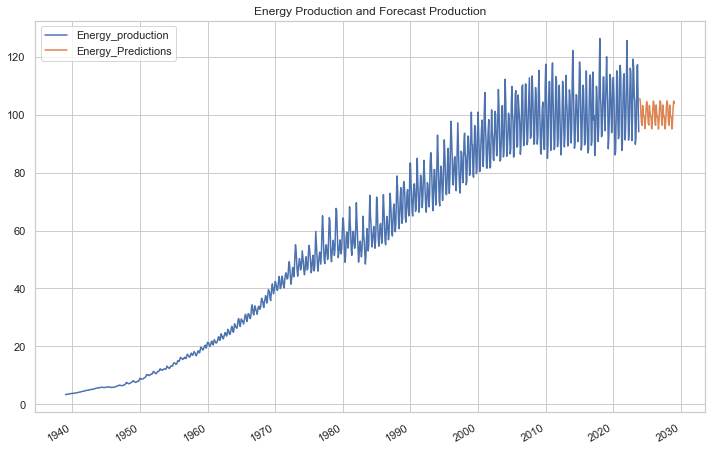

In [90]:
#plot the original and forecast data
data.plot(label='Original Data', figsize=(12, 8))
plt.title("Energy Production and Forecast Production")

#### Observations
From the plot of actual and predicted values we observed the following;

It appears that the model managed to capture some of the trend of energy production and short term fluctuations such as the seasonal peaks and valleys.

The model however appears to underestimate the uncertainty in the forecasts which may be as a result of insufficient data, or lack of other factors that influence energy production such as economic fluctuations.

## Conclusion

Forecasting energy production in the United States is crucial for ensuring stability amidst evolving energy landscapes. This study aimed to predict energy production trends, enabling a smooth transition towards renewable sources while emphasizing accurate forecasts in the face of shifting demand and supply dynamics.

Despite promising performance by the selected PMDARIMA model, the study also revealed limitations. The models demonstrated an underestimation of uncertainty in predicted values, suggesting potential gaps in accounting for diverse factors influencing energy production. 

## Limitations

The predictive models developed, particularly the selected PMDARIMA model, showcased promising performance by minimizing Mean Squared Error (MSE). However it exhibited limitations in adequately encompassing the inherent uncertainties surrounding energy production. Notably, the observed underestimation of uncertainty in predicted values suggests potential gaps in accounting for diverse factors influencing energy production such as:

 **Weather patterns.**

 **Economic fluctuations** 
    
 **Technological advancements and emerging renewable energy sources**

## Recommendations
From our analysis we recommend the following:

 - **Incorporating other factors:** When devising energy production strategies, it's crucial for the United States to factor in seasonal variations in weather. Particularly during winter and summer months, heightened energy consumption demands attention, necessitating robust production planning to meet these peak periods effectively.
During periods of economic growth, there is often an increase in energy demand due to increased industrial activity, transportation, and consumer spending and vice versa therefore there is need to take this into account while planning

 
 - **Balancing Renewable Energy Reliability:** The transition towards renewable energy sources demands a comprehensive approach. While sources like wind and solar energy present promising alternatives, their reliance on natural conditions requires supplementary support from consistent backup sources. Emphasizing a diversified energy portfolio can ensure reliability despite intermittent renewable resources.
 
 
 - **Optimizing Infrastructure Management:** Strategic planning for energy grid maintenance or significant alterations should be scheduled during periods of low energy demand, notably in April, May, October, and November. Utilizing these months for infrastructural improvements maximizes efficiency by minimizing disruptions to energy supply during periods of peak demand.
 
To fortify future iterations of energy production prediction models, several enhancements and considerations can be undertaken:

1. **Integration of diverse variables:** Enhance model accuracy by integrating a broader spectrum of variables. Consider including weather patterns, economic indicators, regulatory changes and technological advancements, as they wield substantial influence over energy production and consumption dynamics. Incorporating these factors will create a more robust and holistic predictive framework.


2. **Enhanced Data Collection and Regional Analysis:** Expand the scope of data collection to encompass a wider range factors and conduct a detailed regional analysis to account for diverse geographical influences across different areas within the United States. Regional variations significantly impact energy demand and production, warranting a thorough scenario analysis to tailor predictive models to specific regional nuances.


By addressing these recommendations, future predictive models can significantly advance the accuracy and reliability of energy production forecasts, facilitating informed decision-making and resilient energy management strategies.